# Biodiversity in National Parks

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

Really great project summary: https://medium.com/@michael.v.cassidy/biodiversity-in-national-parks-2a4fb3254352

### The data

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

### Inspecting the data

I looked at the data in Excel first, since that is a larger format and one can scroll through and get an overall sense of the information.

`observations` contains columns of the scientific name of the creature, the name of the park it was observed in, and the number of times it was observed.

`species_info` contains columns for what type of animal it is, the scientific name and the common name, and what the conservation status is.

In [3]:
observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [4]:
observations.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [5]:
species_info.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [6]:
# What are the different conservation statuses?

species_info.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [7]:
# How many in each conservation status?

species_info.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [8]:
con_stats = species_info.conservation_status.value_counts().rename_axis('conserv_stat').reset_index(name='counts')
print (con_stats)

         conserv_stat  counts
0  Species of Concern     161
1          Endangered      16
2          Threatened      10
3         In Recovery       4


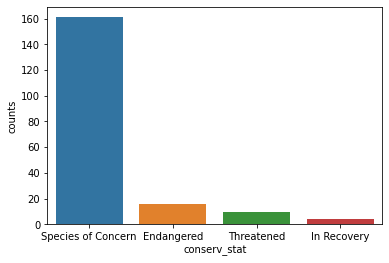

In [9]:
sns.barplot(x = 'conserv_stat', y = 'counts', data = con_stats)

plt.show()


Conservation rankings:

-  **Species of Concern** - plant or animal for which we have concerns about its ability to remain on a landscape for a long time
-  **Endangered** - plant or animal in danger of extinction throughout all or a significant portion of a landscape
-  **Threatened** - plant or animal likely to become endangered throughout all or a significant portion of a landscape
-  **In Recovery** - a plant or animal neither in danger of extinction throughout all or a significant portion of its range nor likely to become so within the foreseeable future.  Recovery requires both that a species be sufficiently abundant and that the threats it faces are eliminated or managed such that removing the ESA's protection does not trigger a recurrence of the species' decline

In [10]:
# How many different categories of species are there?

species_info.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [11]:
# How many in each category?

species_info.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

Vascular plants are things like ferns, conifers, and flowering plants, and nonvascular plants are like mosses and algae.

In [12]:
# What are the different parks?
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

| Park Name | Size (in acres) | Location |
|-----------|-----------------:|----------|
|Yellowstone National Park          | 2,219,791 |  western United States (WY, MT, and ID)  |
|Yosemite National Park             | 759,620 | western United States (California) |
|Great Smoky Mountains National Park| 522,419 | southeastern United States (NC and TN) |
|Bryce National Park                |  35,835 | southwestern United States (Utah)  |


## But does this reflect the actual data?  Data cleaning

The `observations` data set should have four observations (1 per park) per species.  Agrostis gigantea (black bent and redtop grass) has more than one observation. What do we do with this?  Which observation goes with which common name?

The `species_info` data set has multiple duplicates for the scientific name.

Would it be responsible to combine all the observations for the scientific names into one group?

In [13]:
# Are there any null values?
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [14]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [15]:
# look at duplicates
species_info[species_info.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [16]:
species_info[species_info.scientific_name == 'Agrostis gigantea']

,category,scientific_name,common_names,conservation_status
2134,Vascular Plant,Agrostis gigantea,Redtop,NaN
5554,Vascular Plant,Agrostis gigantea,"Black Bent, Redtop, Water Bentgrass",NaN


In [17]:
observations[observations.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [18]:
observations[(observations.scientific_name == 'Agrostis gigantea') & (observations.park_name == 'Yellowstone National Park')]

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,253
483,Agrostis gigantea,Yellowstone National Park,235


In [19]:
sum_ag = 253 + 235
sum_ag

488

In [20]:
# pick out the scientific name duplicates based on parks in the observations df and 
# sum the observation count. 
# Then get rid of the duplicates

observations['total_observations'] = observations.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
observations.drop_duplicates(subset=['scientific_name', 'park_name'], inplace = True )
observations = observations[['scientific_name', 'park_name', 'total_observations']]

In [21]:
observations

,scientific_name,park_name,total_observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [22]:
observations[(observations.scientific_name == 'Agrostis gigantea') & (observations.park_name == 'Yellowstone National Park')]

,scientific_name,park_name,total_observations
449,Agrostis gigantea,Yellowstone National Park,488


In [23]:
# drop/combine the duplicates in species_info.
species_info[species_info.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


In [24]:
observations[observations.scientific_name == 'Canis lupus']

,scientific_name,park_name,total_observations
1294,Canis lupus,Yosemite National Park,196
1766,Canis lupus,Bryce National Park,130
10190,Canis lupus,Great Smoky Mountains National Park,59
10268,Canis lupus,Yellowstone National Park,330


In [25]:
species_info = species_info.fillna('No Status')
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status
1,Mammal,Bos bison,"American Bison, Bison",No Status
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Status
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Status


In [26]:
# What to do with this type of duplicate? Assign the conservation statuses values and get averages?
# Put the statuses in their own columns? Concatenate?

# Change conservation status to ordered. But first change NA to 'No Status'.

# but if we're counting categories, would this work for plotting?  Keep the original statuses?

species_info['conservation_status'] = pd.Categorical(species_info['conservation_status'], 
                                                     ['No Status', 'In Recovery', 'Species of Concern', 'Threatened', 'Endangered'],
                                                     ordered = True)
species_info['conservation_status'].unique()

['No Status', 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']
Categories (5, object): ['No Status' < 'In Recovery' < 'Species of Concern' < 'Threatened' < 'Endangered']

In [27]:
species_info['conservation_status'] = species_info['conservation_status'].cat.codes
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0
1,Mammal,Bos bison,"American Bison, Bison",0
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",0
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",0
4,Mammal,Cervus elaphus,Wapiti Or Elk,0


In [28]:
species_info[species_info.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,4
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",1
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",4


In [29]:
species_info['conservation_status'] = species_info.groupby(['scientific_name'])['conservation_status'].transform('mean')
species_info.drop_duplicates(subset=['scientific_name'], inplace = True)
species_info = species_info[['category', 'scientific_name', 'common_names', 'conservation_status']]
species_info[species_info.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,3.0


In [30]:
species_info.head(50)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0.0
1,Mammal,Bos bison,"American Bison, Bison",0.0
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",0.0
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",0.0
4,Mammal,Cervus elaphus,Wapiti Or Elk,0.0
5,Mammal,Odocoileus virginianus,White-Tailed Deer,0.0
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",0.0
7,Mammal,Canis latrans,Coyote,2.0
8,Mammal,Canis lupus,Gray Wolf,3.0
9,Mammal,Canis rufus,Red Wolf,4.0


In [31]:
cnsv_stats = species_info.conservation_status.value_counts().rename_axis('conserv_stat').reset_index(name='counts')
print (cnsv_stats)

   conserv_stat  counts
0           0.0    5362
1           2.0     151
2           4.0      14
3           3.0      10
4           1.0       3
5           1.5       1


In [32]:
#drop 0?

cnsv_stats.drop(cnsv_stats.index[0], inplace=True)
cnsv_stats

,conserv_stat,counts
1,2.0,151
2,4.0,14
3,3.0,10
4,1.0,3
5,1.5,1


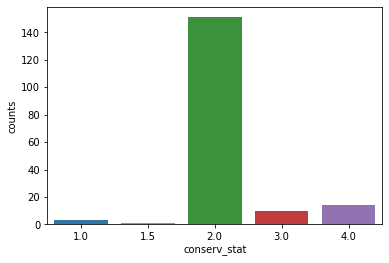

In [33]:
sns.barplot(x = 'conserv_stat', y = 'counts', data = cnsv_stats)
plt.show()

In [34]:
# Turn the numbers back into names?
# 'No Status' < 'In Recovery' < 'Species of Concern' < 'Threatened' < 'Endangered'
def status(x):
    if x == 0.0:
        return 'No Status'
    elif x == 1.0:
        return 'In Recovery'
    elif x == 2.0:
        return 'Species of Concern'
    elif x == 3.0:
        return 'Threatened'
    elif x == 4.0:
        return 'Endangered'
    else:
        return 'Combined Status'
    
status(1.0)

'In Recovery'

In [35]:
species_info['status'] = species_info.conservation_status.apply(lambda x: status(x))
species_info.head(50)

,category,scientific_name,common_names,conservation_status,status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0.0,No Status
1,Mammal,Bos bison,"American Bison, Bison",0.0,No Status
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",0.0,No Status
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",0.0,No Status
4,Mammal,Cervus elaphus,Wapiti Or Elk,0.0,No Status
5,Mammal,Odocoileus virginianus,White-Tailed Deer,0.0,No Status
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",0.0,No Status
7,Mammal,Canis latrans,Coyote,2.0,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,3.0,Threatened
9,Mammal,Canis rufus,Red Wolf,4.0,Endangered


~ 5,000 species are 'no status' (0), the next category is 'species of concern' at 151 (2). There are only 3 species 'in recovery'(1), 10 species that are 'threatened' (3), and 14 that are 'endangered' (4). There is one species that is in between 'in recovery' and 'species of concern.

In [36]:
# print the 1.5?
one_point_five = species_info[species_info.conservation_status == 1.5]
one_point_five
# print(species_info['conservation_status'] == '1.5')

,category,scientific_name,common_names,conservation_status,status
560,Fish,Oncorhynchus mykiss,Rainbow Trout,1.5,Combined Status


Things it may be useful to know:
-  what creatures are under the gravest threat at each park?
-  what is the breakdown of threat categories at each park?
-  should each park be focusing their attention elsewhere, or are they doing ok?


-  which animals are under the gravest threat? ie, how many and what type are in the worst category
-  what are the categories, and what do they mean?
-  what does the distribution of the conservation status look like?
-  is there one type or more types of species that are more likely to be in danger?
-  what distribution do the observations have? are some species more likely to be spotted or counted?


## Species under the gravest threat

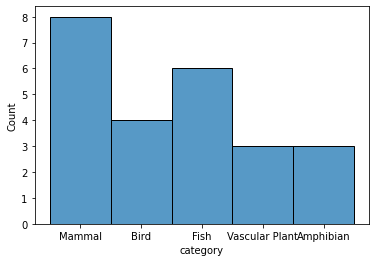

In [37]:
# Histogram/bar chart of 'Endangered' or 'Threatened' status in each category of species

# sns.barplot(x = 'category', y = [species_info.conservation_status == 'Endangered'].count, data = species_info)
# plt.show()
sns.histplot(species_info.category[(species_info.status == 'Endangered') | (species_info.status == 'Threatened')])
plt.show()

In [38]:
# what creatures are under the gravest threat at each park?
# combine dataframes
# join dataframes on scientific name, (doesn't have duplicates).

joined_df = species_info.merge(observations, how='left', on='scientific_name')
joined_df.head()

,category,scientific_name,common_names,conservation_status,status,park_name,total_observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0.0,No Status,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0.0,No Status,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0.0,No Status,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,0.0,No Status,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",0.0,No Status,Yosemite National Park,128


In [39]:
joined_df[joined_df.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status,status,park_name,total_observations
32,Mammal,Canis lupus,Gray Wolf,3.0,Threatened,Yosemite National Park,196
33,Mammal,Canis lupus,Gray Wolf,3.0,Threatened,Bryce National Park,130
34,Mammal,Canis lupus,Gray Wolf,3.0,Threatened,Great Smoky Mountains National Park,59
35,Mammal,Canis lupus,Gray Wolf,3.0,Threatened,Yellowstone National Park,330


In [40]:
# threatened and endangered are the direst categories
# want to see common name, status, and park name?
# count how many endangered and threatened species there are at each park

yosemite_gavest_threat = joined_df[((joined_df.status == 'Threatened') 
                                   | (joined_df.status == 'Endangered')) 
                                   & (joined_df.park_name == "Yosemite National Park")]
yosemite_gavest_threat

,category,scientific_name,common_names,conservation_status,status,park_name,total_observations
32,Mammal,Canis lupus,Gray Wolf,3.0,Threatened,Yosemite National Park,196
37,Mammal,Canis rufus,Red Wolf,4.0,Endangered,Yosemite National Park,34
138,Mammal,Myotis grisescens,Gray Myotis,4.0,Endangered,Yosemite National Park,39
155,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",3.0,Threatened,Yosemite National Park,73
156,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",4.0,Endangered,Yosemite National Park,36
290,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",4.0,Endangered,Yosemite National Park,36
695,Bird,Grus americana,Whooping Crane,4.0,Endangered,Yosemite National Park,37
1105,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",4.0,Endangered,Yosemite National Park,45
1372,Bird,Picoides borealis,Red-Cockaded Woodpecker,4.0,Endangered,Yosemite National Park,43
1960,Fish,Erimonax monachus,Spotfin Chub,3.0,Threatened,Yosemite National Park,69


In [41]:
# count the categories and give a percentage
# yosemite_cat_counts = yosemite_gavest_threat.category.value_counts()
yosemite_cat_counts = yosemite_gavest_threat.category.value_counts().rename_axis('category').reset_index(name='counts')
yosemite_cat_counts

,category,counts
0,Mammal,8
1,Fish,6
2,Bird,4
3,Vascular Plant,3
4,Amphibian,3


In [42]:
# percentage
# yosemite_cat_counts.counts.apply(lambda x: x/x.sum()*100,2), axis=1)
yosemite = round(yosemite_cat_counts.counts[yosemite_cat_counts.category == 'Mammal'] / yosemite_cat_counts.counts.sum() * 100,1)
yosemite

0    33.3
Name: counts, dtype: float64

In [43]:
yellowstone_gavest_threat = joined_df[((joined_df.status == 'Threatened') 
                                   | (joined_df.status == 'Endangered')) 
                                   & (joined_df.park_name == "Yellowstone National Park")]
yellowstone_cat_counts = yellowstone_gavest_threat.category.value_counts().rename_axis('category').reset_index(name='counts')
yellowstone = round(yosemite_cat_counts.counts[yellowstone_cat_counts.category == 'Mammal'] / yellowstone_cat_counts.counts.sum() * 100,1)

smoky_mtn_gavest_threat = joined_df[((joined_df.status == 'Threatened') 
                                   | (joined_df.status == 'Endangered')) 
                                   & (joined_df.park_name == "Great Smoky Mountains National Park")]
smoky_mtn_cat_counts = smoky_mtn_gavest_threat.category.value_counts().rename_axis('category').reset_index(name='counts')
smoky_mtn = round(smoky_mtn_cat_counts.counts[smoky_mtn_cat_counts.category == 'Mammal'] / smoky_mtn_cat_counts.counts.sum() * 100,1)

bryce_gavest_threat = joined_df[((joined_df.status == 'Threatened') 
                                   | (joined_df.status == 'Endangered')) 
                                   & (joined_df.park_name == "Bryce National Park")]
bryce_cat_counts = bryce_gavest_threat.category.value_counts().rename_axis('category').reset_index(name='counts')
bryce = round(bryce_cat_counts.counts[smoky_mtn_cat_counts.category == 'Mammal'] / bryce_cat_counts.counts.sum() * 100,1)

print(yellowstone, smoky_mtn, bryce)
# yellowstone_gavest_threat

0    33.3
Name: counts, dtype: float64 0    33.3
Name: counts, dtype: float64 0    33.3
Name: counts, dtype: float64


In [44]:
# Each park has the same ratio of threatened and endangered categories. 
# So maybe it needs to be observations?

In [46]:
# gravest_threat_df = joined_df[['park_name', 'category', 'status', 'total_observations']].groupby(['park_name', 'category', 'status']).total_observations.sum().unstack()
park_obs_df = joined_df[['park_name', 'category', 'total_observations']].groupby(['park_name', 'category']).total_observations.sum().unstack()
park_obs_df = park_obs_df.apply(lambda x: round(x/x.sum()*100,2), axis=1)
park_obs_df

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,1.28,8.97,2.16,3.57,5.73,1.38,76.92
Great Smoky Mountains National Park,1.32,8.74,2.13,3.48,5.76,1.32,77.26
Yellowstone National Park,1.35,8.82,2.12,3.52,5.75,1.35,77.10
Yosemite National Park,1.33,8.83,2.16,3.51,5.77,1.33,77.08


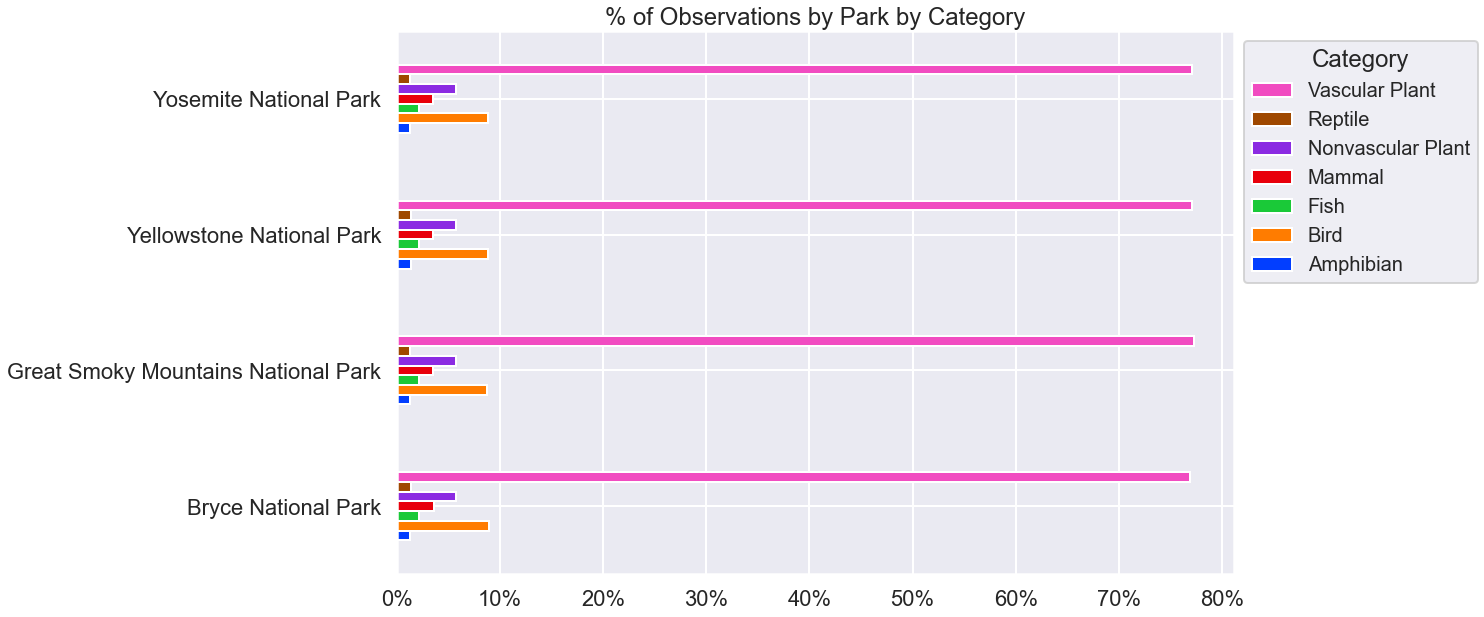

In [47]:
sns.set_context('poster')
sns.set_style("darkgrid")
sns.set_palette("bright")
# ax = gravest_threat_df.plot(figsize=(15, 10))
ax = park_obs_df.plot(kind='barh', figsize=(15, 10))
plt.title('% of Observations by Park by Category')
# Rotate labels to better accomodate
plt.ylabel('')
plt.xlabel('')
# Format X labels with % and no decimal points
ax.xaxis.set_major_formatter(lambda x,pos :'{:.0f}%'.format(x))
#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
#specify order of items in legend
order = [6,5,4,3,2,1,0]
#add legend to plot
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Category', fontsize = 'small', loc = 2, bbox_to_anchor = (1,1))
plt.show()


## Which conservation status has the most species in it?

In [48]:
cnsv_stats_joined_df = joined_df.status.value_counts().rename_axis('conserv_stat').reset_index(name='counts')
cnsv_stats_joined_df

,conserv_stat,counts
0,No Status,21448
1,Species of Concern,604
2,Endangered,56
3,Threatened,40
4,In Recovery,12
5,Combined Status,4


In [49]:
cnsv_stats_species_info = species_info.status.value_counts().rename_axis('conserv_stat').reset_index(name='counts')
cnsv_stats_species_info
# smaller, because it's not all four parks? 
# It's just the species. cnsv_stats_joined_df is species_info x 4.
# So same ration, because the same species are observed in all parks.


,conserv_stat,counts
0,No Status,5362
1,Species of Concern,151
2,Endangered,14
3,Threatened,10
4,In Recovery,3
5,Combined Status,1


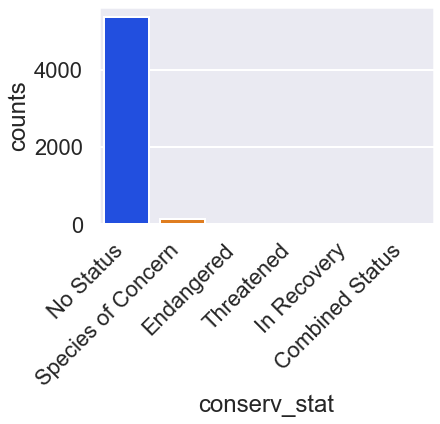

In [56]:
# Chart of how many species in each conservation status - distribution of conservation status?

# sns.histplot(species_info.conservation_status)
ax=sns.barplot(x = 'conserv_stat', y = 'counts', data = cnsv_stats_species_info)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('conserve-status-species.png')
plt.show()


In [51]:
# In what parks are the observations taken?

observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

## What park has the most observations?

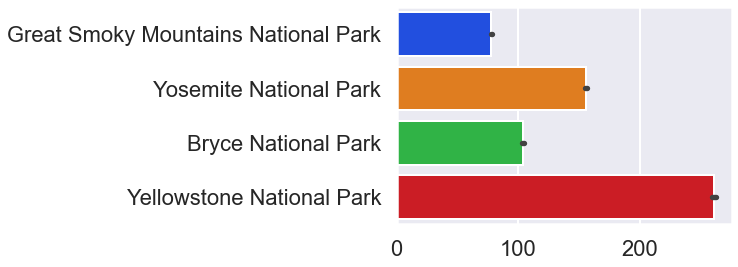

In [52]:
sns.barplot(y = 'park_name', x = 'total_observations', data = observations)
plt.ylabel('')
plt.xlabel('')
plt.show() 

Which park has the most endangered species?  We can't know that, we can only know the number of observations, and we've seen that there are the most observations in the biggest park.

In [53]:
# merge the dataframes

# merged = species_info.merge(observations, how='left', on='scientific_name')
# merged.head(50)

In [54]:
# # sns.histplot(merged.conservation_status)
# sns.histplot(joined_df.status)
# ax = joined_df.plot(kind='barh', figsize=(15, 10))
# plt.show()

In [55]:
# sns.histplot(joined_df.park_name[joined_df.conservation_status == 'Endangered'])
# plt.show()